# Chapter 4 Treatment Comparisons in Clinical Trials with Covariates

## 1. Analysis of Covariance (ANCOVA)

- Combination of analysis of variance and regression

### Analysis of Variance (ANOVA)

#### One-way ANOVA
- $y _{ij} = \mu + \alpha  _{i} + \epsilon  _{ij}$ 
- $i=1,\dots,I$ // $j=1,\dots,n_{j}$
- $H_{0}$ : $\alpha_{i}=0, i=1,\dots,I$
- $H_{1}$ : At least one of the $\alpha_{i}$ is not zero 

#### Multiple Comparisons (Tukey's honest significant difference(HSD))
- ${\hat{\alpha }} _{i} - {\hat{\alpha }} _{j} \pm \frac {q _{\alpha ,df _{1} ,df _{2}}} {\sqrt {2}} se( {\hat{\alpha }} _{i} - {\hat{\alpha }} _{j} )$ ($df_{1}=I, df_{2}=\sum _{i=1} ^{I} n _{i} -I$)

#### Multi-Way ANOVA
- $y_{ijk} = \mu + \alpha_{i} + \beta_{j} + (\alpha\beta)_{ij} + \epsilon_{ijk}$
- $i=1,\dots,I$ // $j=1,\dots,J$ // $k=1,\dots,n_{ij}$

#### Multivariate Analysis of Variance (MANOVA)
- Wilk's Lambda
- Hotelling-Lawley's trace
- Pillai-Bartlett's criterion
- Roy's greatest root

### Regression Analysis

#### Linear Regression model
- $y = X\beta + \epsilon$

#### Logistic Regression model
- $Y \sim B(n,p) \rightarrow P(Y=y) = $$n \choose x$$p^{y}(1-p)^{n-y}$, $y=0,1,\dots,n$
- $\log_ {} \frac {p} {1-p}$$= \beta_{0} + \beta_{1} x_{1} + \dots + \beta_{q} x_{q} = X\beta$

#### Poisson Regression model
- $Y \sim Poisson(\mu) \rightarrow P(Y=y) = $$\frac {e^{-\mu} \mu^{y}} {y!}$, $y=0,1,\dots$
- $log_ {} {\mu_{i}} = X\beta$

#### Overdispersion in generalized linear regression
- If the deviance from the fitted model is too large...
  - 1. Estimate and Adjust the Dispersion Parameter
  - 2. Using Quasi-Likelihood
  - 3. Fit Negative Binomial Regression ( $ N \sim NB(k,p) \rightarrow P(N=n) = $${n-1} \choose {k-1}$$p^{k}(1-p)^{n-k}$, $n=k,k+1,\dots$ )

## 2. Data Analysis in R

### 2.1 Analysis of diastolic blood pressure(DBP) trial
- 이완기 혈압 측정과 관련한 데이터
-  treatment A (new drug), treatment B (placebo)
- 약물을 투여했을 때 이완기 혈압이 유의하게 낮아지는지 확인하고자 함.
- DBP1 ~ DBP5 : 최초에 DBP1을 측정하고 이후 4주간 주마다 DBP 측정
- 4주 이후 측정된 DBP5와 최초 측정된 DPB1의 차이를 분석

#### 2.1.1 Analysis of Baseline data

In [51]:
###################################################
### code chunk number 2: R4ANCOVA.rnw:334-337
###################################################
dat <- read.csv("DBP.csv",header=T,sep=',')
# creat the difference
dat$diff = dat$DBP5-dat$DBP1
head(dat)

Subject,TRT,DBP1,DBP2,DBP3,DBP4,DBP5,Age,Sex,diff
1,A,114,115,113,109,105,43,F,-9
2,A,116,113,112,103,101,51,M,-15
3,A,119,115,113,104,98,48,F,-21
4,A,115,113,112,109,101,42,F,-14
5,A,116,112,107,104,105,49,M,-11
6,A,117,112,113,104,102,47,M,-15


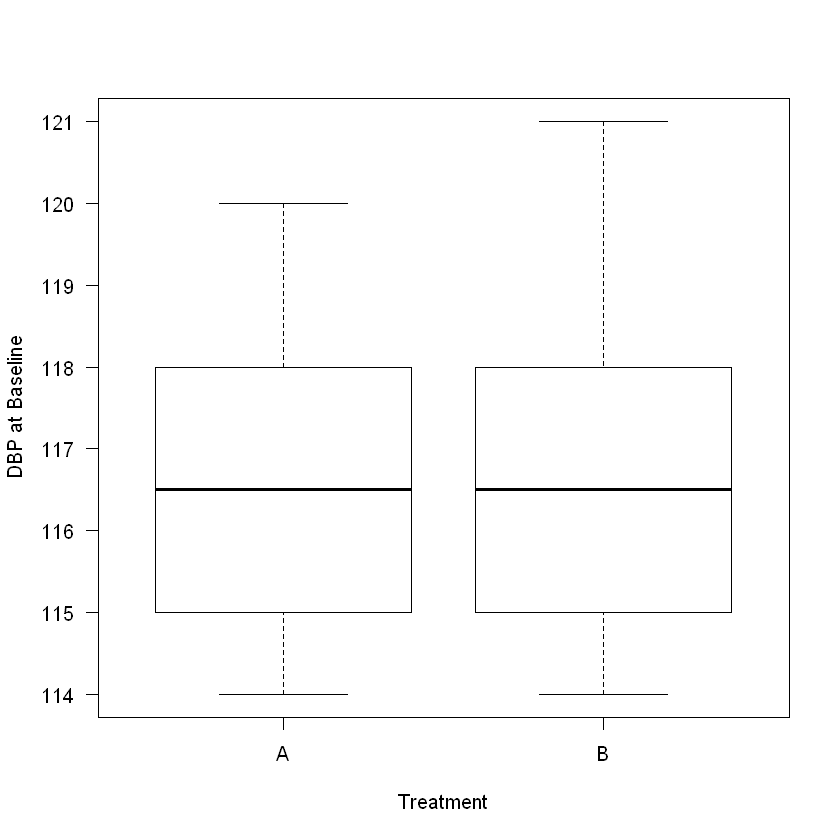

In [52]:
###################################################
### code chunk number 3: ANCOVA.BaseDBP
###################################################
boxplot(DBP1~TRT, dat, las=1, 
    xlab="Treatment", ylab="DBP at Baseline")

- 최초 측정된 이완기 혈압에 대한 boxplot을 통해 아직 약물 처리 여부에 따른 혈압의 차이가 거의 없다고 보여진다. 이에 대한 통계적인 분석을 t-test를 통해 수행하면 다음과 같다. 

In [53]:
###################################################
### code chunk number 5: R4ANCOVA.rnw:360-361
###################################################
t.test(DBP1~TRT, dat)


	Welch Two Sample t-test

data:  DBP1 by TRT
t = -0.30755, df = 37.829, p-value = 0.7601
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.516666  1.116666
sample estimates:
mean in group A mean in group B 
         116.55          116.75 


- 검정결과 유의확률 p-value의 값이 0.7601로서 유의수준 0.05보다 매우 큰 값이다. 이에 따라 최초 측정된 이완기 혈압의 경우 약물 처리 여부에 따른 혈압의 차이가 없다는 귀무가설을 받아들이게 된다. 그러므로 본 실험을 통해 약물 처리 여부의 효과를 가려내기에 충분하다고 판단할 수 있다.
- 다음으로 DBP 데이터에 있는 40명의 피실험자에 대한 약물 처리 여부, 성별에 따른 $2 \times 2$ 테이블을 살펴보고 이에 대한 비율검정을 실시한다. 이에 대한 결과는 다음과 같다.

In [54]:
###################################################
### code chunk number 6: R4ANCOVA.rnw:368-374
###################################################
# call function table to make the 2 by 2 table 
SexbyTRT = table(dat$TRT,dat$Sex)
# print it
SexbyTRT
# call prop.test to test the difference
prop.test(SexbyTRT)

   
     F  M
  A  8 12
  B 10 10


	2-sample test for equality of proportions with continuity correction

data:  SexbyTRT
X-squared = 0.10101, df = 1, p-value = 0.7506
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.4567829  0.2567829
sample estimates:
prop 1 prop 2 
   0.4    0.5 


- $2 \times 2$ 테이블을 통해 약물처리그룹 A는 8명의 여자와 12명의 남자로(여자비율 40%), 대조그룹 B는 남자와 여자 모두 각각 10명(여자비율 50%)으로 구성되어 있음을 확인 가능하다.
- 이에 대해 비율검정을 실시한 결과 유의확률 p-value의 값이 0.7506으로서 유의수준 0.05보다 매우 큼을 알 수 있다. 이에 따라 두 그룹의 여자비율의 차이가 없다는 귀무가설을 받아들이게 된다. 즉, 두 그룹이 성별 기준으로 균형되게 구성되어 있다고 판단할 수 있다.
- 이제 최초 측정 혈압 DBP1과 공변량 Sex, Age 사이의 관계를 확인해보기 위한 회귀모형을 구축해보도록 한다.

In [55]:
###################################################
### code chunk number 7: R4ANCOVA.rnw:381-385
###################################################
# Fit the main effect model on "Sex" and "Age"
bm1=lm(DBP1~Sex+Age, dat)
# Show the result
summary(bm1)


Call:
lm(formula = DBP1 ~ Sex + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1988 -0.5601  0.1693  0.5245  1.9506 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 104.38337    1.12876  92.477  < 2e-16 ***
SexM         -0.64220    0.30158  -2.129   0.0399 *  
Age           0.26388    0.02284  11.552 7.79e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9454 on 37 degrees of freedom
Multiple R-squared:  0.7947,	Adjusted R-squared:  0.7836 
F-statistic: 71.62 on 2 and 37 DF,  p-value: 1.9e-13


- 분석결과 성별과 나이 모두 유의수준 0.05 하에서 최초 측정 이완기 혈압과 유의미한 관계가 있다고 보여진다. 이에 대한 결과를 그래프로 표현해보면 다음과 같다.

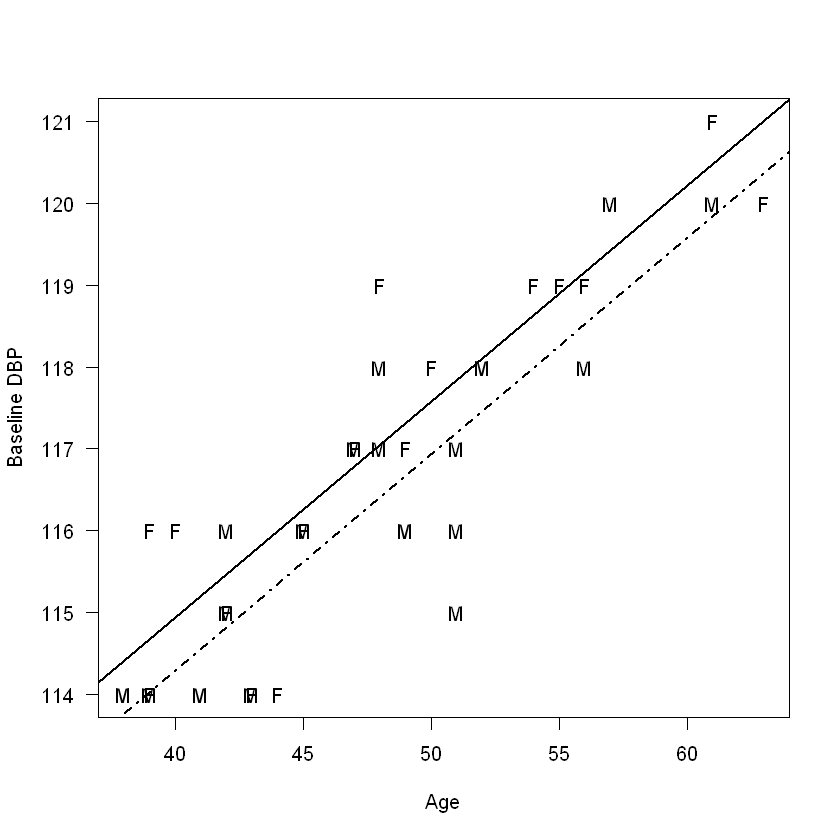

In [56]:
###################################################
### code chunk number 8: ANCOVA.fig4Baseline
###################################################
# plot the ``Age" to ``DBP1"
plot(DBP1~Age,las=1,pch=as.character(Sex), dat, 
	xlab="Age", ylab="Baseline DBP")
# add the regression lines using ``abline"
abline(bm1$coef[1], bm1$coef[3],lwd=2, lty=1)
abline(bm1$coef[1]+bm1$coef[2], bm1$coef[3],lwd=2, lty=4)

- 위의 그래프에서 직선은 여자, 점선은 남자와 관련이 있다. 즉 나이에 따라 측정 혈압이 높아지는 경향이 있고 남자보다 여자가 측정 혈압이 높다고 판단할 수 있다.

#### 2.1.2 ANCOVA of DBP Change from Baseline

- 이제부터는 공변량분석(ANCOVA)를 통해 약물 처리 여부(TRT)에 따른 이완기 혈압의 차이(diff)에 대한 분석을 실시해보겠다. 우선 데이터 내의 모든 공변량인 TRT, Age, Sex를 모두 포함하고 이들의 교호작용(interactions)까지 포함한 full model을 구축하고, stepwise model selection을 통해 복잡한 모형을 단순화할 것이다.

In [57]:
###################################################
### code chunk number 10: R4ANCOVA.rnw:415-421
###################################################
# start with full model
m0 = lm(diff~TRT*Age*Sex, dat)
# stepwise model selection
m1 = step(m0)
# output the ANOVA
anova(m1)

Start:  AIC=79.52
diff ~ TRT * Age * Sex

              Df Sum of Sq    RSS   AIC
- TRT:Age:Sex  1    2.7059 198.47 78.07
<none>                     195.76 79.52

Step:  AIC=78.07
diff ~ TRT + Age + Sex + TRT:Age + TRT:Sex + Age:Sex

          Df Sum of Sq    RSS    AIC
- TRT:Sex  1    1.3256 199.79 76.336
- TRT:Age  1    9.5638 208.03 77.952
<none>                 198.47 78.070
- Age:Sex  1   17.0694 215.53 79.370

Step:  AIC=76.34
diff ~ TRT + Age + Sex + TRT:Age + Age:Sex

          Df Sum of Sq    RSS    AIC
<none>                 199.79 76.336
- TRT:Age  1    10.272 210.06 76.341
- Age:Sex  1    16.164 215.96 77.448


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TRT,1,1081.60000,1081.600000,184.0638195,2.797907e-15
Age,1,51.06922,51.069217,8.6908239,5.745652e-03
Sex,1,1.05506,1.055060,0.1795472,6.744314e-01
TRT:Age,1,10.31989,10.319888,1.7562112,1.939349e-01
Age:Sex,1,16.16426,16.164263,2.7507913,1.064052e-01
Residuals,34,199.79157,5.876223,NA,NA


- stepwise model selection을 통해 모형을 선택한 결과를 보면 두가지 교호작용 TRT:Age, Age:Sex 가 포함되어 있다. 하지만 이 두가지 교호작용은 유의수준 0.05 하에서 통계적으로 유의미하지 않으며 이는 주효과(main effect)인 성별(Sex)도 마찬가지이다. 이에 따라 이들을 모두 포함하지 않는 reduced model을 구축하면 다음과 같다.

In [58]:
###################################################
### code chunk number 11: R4ANCOVA.rnw:425-431
###################################################
# fit the reduced model
m2 = lm(diff~TRT+Age, dat)
# output the anova
anova(m2)
# output the model fit
summary(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TRT,1,1081.60000,1081.600000,176.039512,1.228111e-15
Age,1,51.06922,51.069217,8.311945,6.525182e-03
Residuals,37,227.33078,6.144075,NA,NA



Call:
lm(formula = diff ~ TRT + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9039 -1.6516 -0.0091  1.1557  5.2299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.78086    2.97236  -2.281  0.02838 *  
TRTB        10.13149    0.78936  12.835 3.38e-15 ***
Age         -0.17323    0.06009  -2.883  0.00653 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.479 on 37 degrees of freedom
Multiple R-squared:  0.8328,	Adjusted R-squared:  0.8238 
F-statistic: 92.18 on 2 and 37 DF,  p-value: 4.243e-15


- reduced model을 구축한 결과 TRT와 Age에 대한 효과가 유의수준 0.05 하에서 모두 통계적으로 의미가 있음을 알 수 있다. 이 모형에 대한 F 통계량 p-value는 $4.24 \times 10^{-5}$, 결정계수는 $R^{2} = 0.8328$로서 모형이 의미있게 구축되었음을 확인 가능하다. 
- final model : $DBP Change = − 6.78 − 0.173 × Age + 10.132 × TRTplacebo$
- 이 모형에 대한 그래프를 그려보면 다음과 같다.

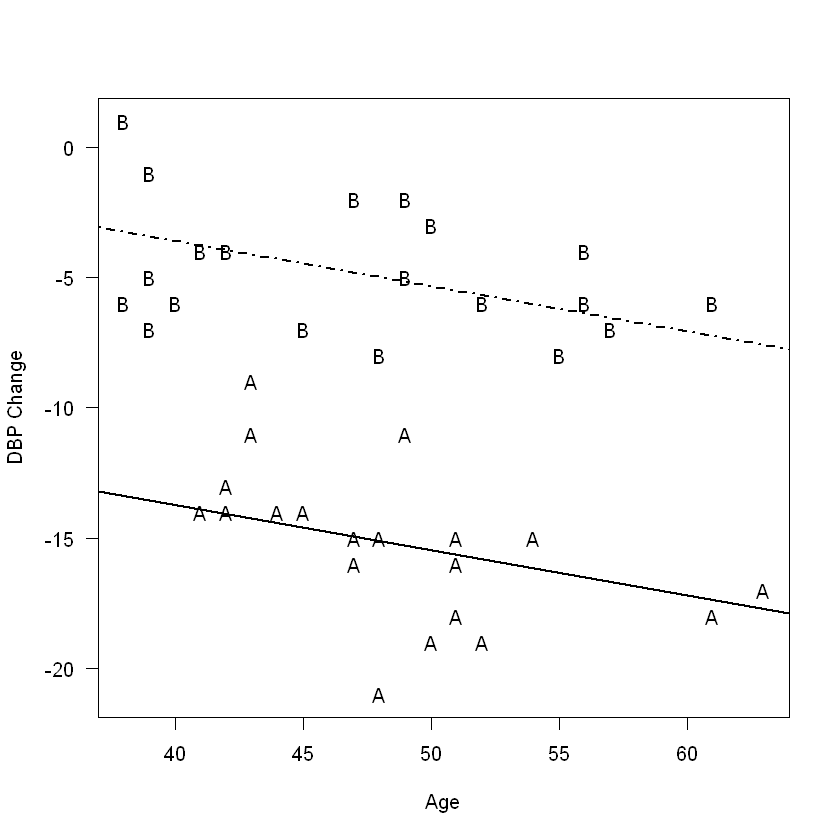

In [59]:
###################################################
### code chunk number 12: ANCOVA.fig4diff
###################################################
plot(diff~Age,las=1,pch=as.character(TRT), dat, 
xlab="Age", ylab="DBP Change")
abline(m2$coef[1], m2$coef[3],lwd=2, lty=1)
abline(m2$coef[1]+m2$coef[2], m2$coef[3],lwd=2, lty=4)

- 그래프를 통해 약물을 투여한 경우(A) 그렇지 않은 경우(B)에 비해 혈압이 약 10mmHg 더 떨어지고, 두 그룹 모두 나이가 많을수록 혈압의 변화가 더 커짐을 확인 가능하다.

#### 2.1.3 MANCOVA for DBP Change from Baseline 

- 다음으로 다변량 공변량분석(MANCOVA)를 통해 1주후, 2주후, 3주후, 4주후의 이완기 혈압의 차이가 약물 처리 여부(TRT)와 나이(Age)에 따라 전체적으로 유의미한 차이가 있는지 분석해보도록 한다. 분석은 다음의 4가지 기준을 모두 살펴볼 것이다. 
  - Wilk's Lambda
  - Hotelling-Lawley's trace
  - Pillai-Bartlett's criterion
  - Roy's greatest root

In [60]:
###################################################
### code chunk number 14: R4ANCOVA.rnw:466-473
###################################################
# attached the data into this R session
attach(dat)
# create the changes from baseline
diff2to1 = DBP2-DBP1
diff3to1 = DBP3-DBP1
diff4to1 = DBP4-DBP1
diff5to1 = DBP5-DBP1
###################################################
### code chunk number 15: R4ANCOVA.rnw:479-490
###################################################
# call "manova" to fit a manova adjusting for "Age"
macov1=manova(cbind(diff2to1,diff3to1,diff4to1,
			diff5to1)~TRT+Age,dat)

The following objects are masked from dat (pos = 3):

    Age, DBP1, DBP2, DBP3, DBP4, DBP5, diff, Sex, Subject, TRT

The following objects are masked from dat (pos = 9):

    Age, DBP1, DBP2, DBP3, DBP4, DBP5, diff, Sex, Subject, TRT



In [61]:
# then F-test with Pillai (default in R)
summary(macov1)

          Df  Pillai approx F num Df den Df    Pr(>F)    
TRT        1 0.83576   43.255      4     34 6.999e-13 ***
Age        1 0.28748    3.430      4     34   0.01851 *  
Residuals 37                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [62]:
# F-test with Hotelling-Lawley
summary(macov1, test="Hotelling-Lawley")

          Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
TRT        1           5.0888   43.255      4     34 6.999e-13 ***
Age        1           0.4035    3.430      4     34   0.01851 *  
Residuals 37                                                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [63]:
# F-test with Wilks
summary(macov1, test="Wilks")

          Df   Wilks approx F num Df den Df    Pr(>F)    
TRT        1 0.16424   43.255      4     34 6.999e-13 ***
Age        1 0.71252    3.430      4     34   0.01851 *  
Residuals 37                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [64]:
# F-test with Roy
summary(macov1, test="Roy")

          Df    Roy approx F num Df den Df    Pr(>F)    
TRT        1 5.0888   43.255      4     34 6.999e-13 ***
Age        1 0.4035    3.430      4     34   0.01851 *  
Residuals 37                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- 분석결과 4가지 기준 모두 유의수준 0.05 하에서 TRT와 Age 모두 혈압의 변화에 유의미한 영향력이 있음을 알 수 있다.

### 2.2 Analysis of Betablocker Trial
- 22곳의 치료센터에서 측정된 사망률과 관련한 데이터
- 베타차단제가 심근경색증으로 인한 사망률을 효과적으로 낮추는지에 대한 연구가 주된 목적임

In [65]:
###################################################
### code chunk number 16: R4ANCOVA.rnw:502-506
###################################################
library(flexmix)
betablocker = read.csv("betablocker.csv",header=T,sep=",")
betablocker$Center = as.factor(betablocker$Center)
head(betablocker)

Deaths,Total,Center,Treatment
3,39,1,Control
14,116,2,Control
11,93,3,Control
127,1520,4,Control
27,365,5,Control
6,52,6,Control


- 먼저 본 데이터에 대해 logistic regression model을 구축해보도록 한다.

In [66]:
###################################################
### code chunk number 18: beta.glm
###################################################
# fit a logistic regression using glm
beta.glm = glm(cbind(Deaths,Total-Deaths)~Treatment+Center,
		family=binomial,data=betablocker)
# print the model fitting
anova(beta.glm)
###################################################
### code chunk number 19: R4ANCOVA.rnw:522-523
###################################################
summary(beta.glm)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,43,332.99279
Treatment,1,27.23208,42,305.76071
Center,21,282.14015,21,23.62057



Call:
glm(formula = cbind(Deaths, Total - Deaths) ~ Treatment + Center, 
    family = binomial, data = betablocker)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.82826  -0.61775   0.00396   0.53502   1.92138  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.34930    0.42597  -5.515 3.48e-08 ***
TreatmentTreated -0.26097    0.04994  -5.225 1.74e-07 ***
Center2           0.17389    0.48316   0.360   0.7189    
Center3           0.24281    0.50043   0.485   0.6275    
Center4          -0.03907    0.43093  -0.091   0.9278    
Center5          -0.02168    0.44797  -0.048   0.9614    
Center6           0.16851    0.53947   0.312   0.7548    
Center7           0.59662    0.43080   1.385   0.1661    
Center8           0.27148    0.43734   0.621   0.5348    
Center9           0.38877    0.44625   0.871   0.3836    
Center10          0.09580    0.42933   0.223   0.8234    
Center11          0.05200    0.43632   0.119   0

- 모형을 구축해본 결과, Treatment와 Center 모두 유의수준 0.05 하에서 환자의 사망률에 유의미한 영향력이 있음을 알 수 있다. 그리고 residual deviance는 자유도 21에 23.621로서 모형이 유의미하게 구축되었고 overdispersion의 위험은 적은 것으로 보여진다. 만약 overdispersion의 위험이 있다고 가정했을 때 Pearson residual을 통해 dispersion parameter를 추정하면 다음과 같다.

In [67]:
###################################################
### code chunk number 20: R4ANCOVA.rnw:529-531
###################################################
est.dp = sum(resid(beta.glm, type="pearson")^2)/beta.glm$df.res
est.dp

[1] 1.121871

- 위의 결과를 통해 dispersion parameter의 추정값은 약 1.122임을 알 수 있다. 이를 바탕으로 모형을 다시 구축하면 다음과 같다.

In [68]:
###################################################
### code chunk number 21: R4ANCOVA.rnw:535-536
###################################################
summary(beta.glm, dispersion=est.dp)


Call:
glm(formula = cbind(Deaths, Total - Deaths) ~ Treatment + Center, 
    family = binomial, data = betablocker)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.82826  -0.61775   0.00396   0.53502   1.92138  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.34930    0.45118  -5.207 1.92e-07 ***
TreatmentTreated -0.26097    0.05290  -4.933 8.09e-07 ***
Center2           0.17389    0.51176   0.340   0.7340    
Center3           0.24281    0.53005   0.458   0.6469    
Center4          -0.03907    0.45643  -0.086   0.9318    
Center5          -0.02168    0.47448  -0.046   0.9636    
Center6           0.16851    0.57140   0.295   0.7681    
Center7           0.59662    0.45630   1.308   0.1910    
Center8           0.27148    0.46322   0.586   0.5578    
Center9           0.38877    0.47266   0.823   0.4108    
Center10          0.09580    0.45474   0.211   0.8331    
Center11          0.05200    0.46215   0.113   0

- 다시 구축한 모형도 원래의 모형과 같음을 확인 가능하다. 이 두가지 절차를 quasi-likelihood의 방법을 적용한다면 한번에 해결할 수 있다.

In [69]:
###################################################
### code chunk number 22: R4ANCOVA.rnw:540-545
###################################################
# fit quasi-likelihood for binomial data
beta.glm2 = glm(cbind(Deaths,Total- Deaths)~Treatment+Center,
	family=quasibinomial,data=betablocker)
# print the model fit
summary(beta.glm2)


Call:
glm(formula = cbind(Deaths, Total - Deaths) ~ Treatment + Center, 
    family = quasibinomial, data = betablocker)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.82826  -0.61775   0.00396   0.53502   1.92138  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.34930    0.45118  -5.207 3.68e-05 ***
TreatmentTreated -0.26097    0.05290  -4.933 7.02e-05 ***
Center2           0.17389    0.51176   0.340   0.7374    
Center3           0.24281    0.53005   0.458   0.6516    
Center4          -0.03907    0.45643  -0.086   0.9326    
Center5          -0.02168    0.47448  -0.046   0.9640    
Center6           0.16851    0.57140   0.295   0.7710    
Center7           0.59662    0.45630   1.308   0.2052    
Center8           0.27148    0.46322   0.586   0.5641    
Center9           0.38877    0.47266   0.823   0.4200    
Center10          0.09580    0.45474   0.211   0.8352    
Center11          0.05200    0.46215   0.11

- 위의 결과를 통해 추정된 dispersion parameter는 약 1.122이다. 주효과 Treatment에 대한 p-value의 값이 이전에 구축된 모형과 비교했을 때 약간의 차이만 있을뿐 결과는 동일함을 확인할 수 있다.

### 2.3 Analysis of Data from Familial Adenomatous Ployposis Trial
- non-steroidal anti-inflammatory drug (NSAID) in treating familial adenomatous polyposis (FAP) 의 치료효과를 알아보기 위한 데이터

In [70]:
###################################################
### code chunk number 23: R4ANCOVA.rnw:554-556
###################################################
library(HSAUR)
data(polyps)
head(polyps)

number,treat,age
63,placebo,20
2,drug,16
28,placebo,18
17,drug,22
61,placebo,13
1,drug,23


- 본 데이터의 변수 number는 환자의 수로서 counting variable이다. 이에 따라 Poisson Regression model을 적용하면 다음과 같다.

In [71]:
###################################################
### code chunk number 25: R4ANCOVA.rnw:566-570
###################################################
# Poisson Regression
m0.polyps = glm(number~treat*age, polyps, family=poisson())
# print the model fit
summary(m0.polyps)


Call:
glm(formula = number ~ treat * age, family = poisson(), data = polyps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2406  -3.0403  -0.0865   1.4392   5.8490  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.519119   0.153362  29.467  < 2e-16 ***
treatdrug     -1.257258   0.471626  -2.666  0.00768 ** 
age           -0.038403   0.006245  -6.149  7.8e-10 ***
treatdrug:age -0.004631   0.020823  -0.222  0.82402    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 378.66  on 19  degrees of freedom
Residual deviance: 179.49  on 16  degrees of freedom
AIC: 275.83

Number of Fisher Scoring iterations: 5


- 모형을 구축한 결과 표면적으로 주효과 treatment와 age는 number에 대해 통계적으로 유의미한 영향력이 있다. 하지만 residual deviance는 자유도 16에 대해 179.49로 산출되어 overdispersion의 위험성이 크다고 판단된다. 

In [72]:
###################################################
### code chunk number 26: R4ANCOVA.rnw:574-576
###################################################
est.dp = sum(resid(m0.polyps, type="pearson")^2)/m0.polyps$df.res
est.dp

[1] 11.37537

- Pearson residual을 통해 추정된 dispersion parameter는 약 11.375이다. 이를 이용하여 모형을 다시 구축하면 다음과 같다.

In [73]:
###################################################
### code chunk number 27: R4ANCOVA.rnw:579-580
###################################################
summary(m0.polyps, dispersion=est.dp)


Call:
glm(formula = number ~ treat * age, family = poisson(), data = polyps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2406  -3.0403  -0.0865   1.4392   5.8490  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.519119   0.517251   8.737   <2e-16 ***
treatdrug     -1.257258   1.590673  -0.790   0.4293    
age           -0.038403   0.021064  -1.823   0.0683 .  
treatdrug:age -0.004631   0.070230  -0.066   0.9474    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 11.37537)

    Null deviance: 378.66  on 19  degrees of freedom
Residual deviance: 179.49  on 16  degrees of freedom
AIC: 275.83

Number of Fisher Scoring iterations: 5


- 새로 구축한 모형에서는 treatment와 age도 모두 유의한 영향력이 없다는 결과를 보여주고 있다. 하지만, 교호작용은 처음 구축한 모형에서도 유의성이 없었으므로 이를 제외하고 모형을 구축해보도록 한다.

In [74]:
###################################################
### code chunk number 28: R4ANCOVA.rnw:584-592
###################################################
# refit the model without interaction
m1.polyps = glm(number~treat+age, polyps, family=poisson())
# estimate the dispersion parameter
est.dp = sum(resid(m1.polyps, type="pearson")^2)/m1.polyps$df.res
# print the estimated dispersion parameter
est.dp
# print the model fit adjusting the over dispersion
summary(m1.polyps, dispersion=est.dp)

[1] 10.72783


Call:
glm(formula = number ~ treat + age, family = poisson(), data = polyps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2212  -3.0536  -0.1802   1.4459   5.8301  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.52902    0.48106   9.415  < 2e-16 ***
treatdrug   -1.35908    0.38532  -3.527  0.00042 ***
age         -0.03883    0.01951  -1.991  0.04651 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 10.72783)

    Null deviance: 378.66  on 19  degrees of freedom
Residual deviance: 179.54  on 17  degrees of freedom
AIC: 273.88

Number of Fisher Scoring iterations: 5


- 모형을 구축한 결과 추정된 dispersion parameter는 약 10.728이고 treatment와 age 모두 유의미한 영향력이 있다는 결론을 주고 있다. quasi-likelihood의 방법을 적용하면 dispersion parameter를 추정하는 과정까지 한번에 해결할 수 있다.

In [75]:
###################################################
### code chunk number 29: R4ANCOVA.rnw:597-601
###################################################
# fit the quasi Poisson
m2.polyps = glm(number~treat+age, polyps, family=quasipoisson())
# print the model fit
summary(m2.polyps)


Call:
glm(formula = number ~ treat + age, family = quasipoisson(), 
    data = polyps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2212  -3.0536  -0.1802   1.4459   5.8301  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.52902    0.48106   9.415 3.72e-08 ***
treatdrug   -1.35908    0.38533  -3.527  0.00259 ** 
age         -0.03883    0.01951  -1.991  0.06284 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 10.72805)

    Null deviance: 378.66  on 19  degrees of freedom
Residual deviance: 179.54  on 17  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


- 분석결과 age에 대한 p-value의 값이 약 0.062로서 유의수준 0.05보다 크기는 하지만 영향력이 없다고 보기에는 무리가 있다. 결과적으로 두가지 단계를 모두 거치는 과정과 비교했을 때 동일한 결과를 주고 있음을 알 수 있다.
- 또다른 접근법으로서 negative binomial model을 다음과 같이 구축할 수 있다.

In [76]:
###################################################
### code chunk number 30: R4ANCOVA.rnw:607-613
###################################################
# load the MASS library
library(MASS)
# fit the negative binomial model
m3.polyps = glm.nb(number~treat+age, polyps)
# print the model fit
summary(m3.polyps)


Call:
glm.nb(formula = number ~ treat + age, data = polyps, init.theta = 1.719491, 
    link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.83270  -1.13898  -0.08851   0.33637   1.89785  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.52603    0.59466   7.611 2.72e-14 ***
treatdrug   -1.36812    0.36903  -3.707 0.000209 ***
age         -0.03856    0.02095  -1.840 0.065751 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1.7195) family taken to be 1)

    Null deviance: 36.734  on 19  degrees of freedom
Residual deviance: 22.002  on 17  degrees of freedom
AIC: 164.88

Number of Fisher Scoring iterations: 1


              Theta:  1.719 
          Std. Err.:  0.607 

 2 x log-likelihood:  -156.880 

- 모형을 구축한 결과 음이항분포에 대한 모수의 추정값은 $k=1.719$이고 이에 대한 표준오차는 $0.607$이다. 그리고 주효과 treatment에 대한 p-value의 값은 약 0.0002로서 유의수준 0.05 하에서 매우 유의미한 영향력이 있음을 확인 가능하다. 이 결과는 Poisson regression model에 대한 quasi-likelihood 접근법을 적용한 경우와 거의 비슷하다.